In [1]:
import pandas as pd
import seaborn as sns
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

2024-03-24 17:32:05.770912: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-24 17:32:05.868214: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-24 17:32:06.871261: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
train = pd.read_csv('cs-training.csv',index_col='Unnamed: 0')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtypes: fl

In [4]:
df_nan_dep = train[train['NumberOfDependents'].isnull()]

In [5]:
df_nan_dep['age'].value_counts().head()

age
67    99
63    98
64    97
61    96
56    92
Name: count, dtype: int64

In [6]:
correlation_matrix = train.corr()

<Axes: >

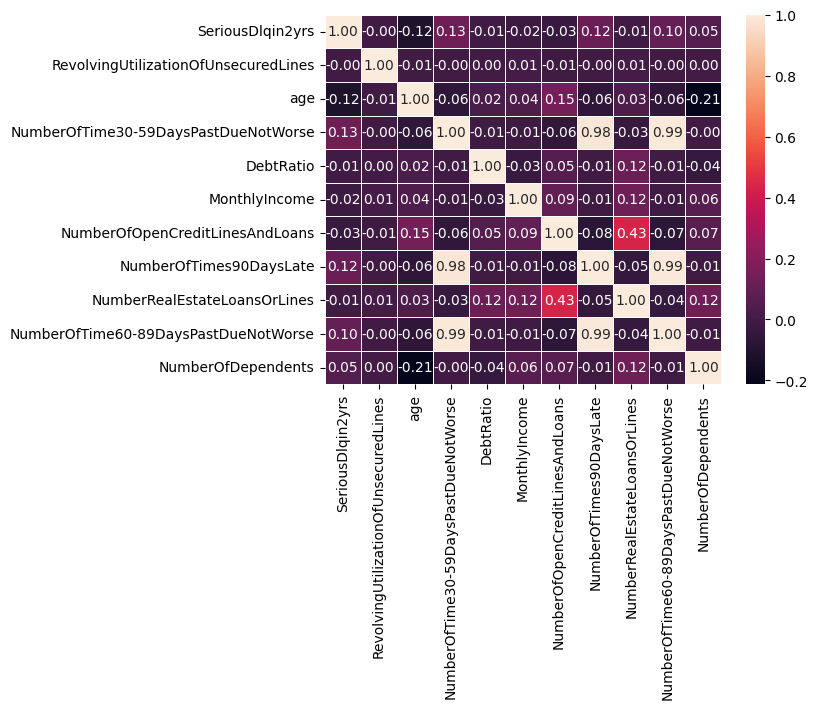

In [7]:
sns.heatmap(correlation_matrix,annot=True, fmt='.2f', linewidths=.5)

In [8]:
train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [9]:
train['NumberOfDependents'].value_counts()

NumberOfDependents
0.0     86902
1.0     26316
2.0     19522
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
10.0        5
9.0         5
20.0        1
13.0        1
Name: count, dtype: int64

In [10]:
def col_groupage(age):
    if age < 41:
            return 0
    elif 41 <= age <= 52:
        return 1
    elif 52 <= age <= 63:
        return 2
    else:
        return 3

In [11]:
train['group_age'] = train['age'].apply(col_groupage)

In [12]:
train['group_age'].value_counts()

group_age
1    42273
2    38379
0    35097
3    34251
Name: count, dtype: int64

In [13]:
train['age'].describe()

count    150000.000000
mean         52.295207
std          14.771866
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64

In [14]:
df_g = train.groupby(['group_age'],as_index=False).mean()

In [15]:
df_g.head()

,group_age,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.103542,7.970877,33.150754,0.800268,208.009503,4983.350219,6.575434,0.674046,0.704077,0.620879,0.805526
1,1,0.081447,7.114874,46.709460,0.413242,371.988437,7494.127727,8.762283,0.210229,1.232512,0.183829,1.246436
2,2,0.054014,5.275971,57.998541,0.320149,461.460715,7593.941239,9.672060,0.144558,1.229970,0.127075,0.628205
3,3,0.025576,3.627873,72.415813,0.155090,356.625613,6408.504249,8.628186,0.052670,0.838457,0.047269,0.226310


In [16]:
round(train['MonthlyIncome'].describe())

count     120269.0
mean        6670.0
std        14385.0
min            0.0
25%         3400.0
50%         5400.0
75%         8249.0
max      3008750.0
Name: MonthlyIncome, dtype: float64

In [17]:
def replace_MonthlyIncome(group_age):
    if group_age == 0:
        return 4980
    if group_age == 1:
        return 7490
    if group_age == 2:
        return 7590
    else:
        return 6400

In [18]:
train['MonthlyIncome'] = train['MonthlyIncome'].fillna(train['MonthlyIncome'].apply(replace_MonthlyIncome))

In [19]:
train['NumberOfDependents'] = train['NumberOfDependents'].fillna(0)

In [20]:
df_g_ = train.groupby(['group_age','NumberOfDependents']).count()

In [21]:
df_g_

SeriousDlqin2yrs  \
group_age NumberOfDependents                     
0         0.0                            20674   
          1.0                             5765   
          2.0                             5286   
          3.0                             2430   
          4.0                              720   
          5.0                              182   
          6.0                               27   
          7.0                                5   
          8.0                                4   
          9.0                                2   
          10.0                               1   
          20.0                               1   
1         0.0                            17577   
          1.0                             7831   
          2.0                             9437   
          3.0                             5191   
          4.0                             1670   
          5.0                              416   
          6.0                               97   
          7.0                               35   
          8.0                               14   
          9.0                                2   
          10.0                               3   
2         0.0                            24291   
          1.0                             7786   
          2.0                             4036   
          3.0                             1653   
          4.0                              425   
          5.0                              137   
          6.0                               33   
          7.0                               10   
          8.0                                5   
          9.0                                1   
          10.0                               1   
          13.0                               1   
3         0.0                            28284   
          1.0                             4934   
          2.0                              763   
          3.0                              209   
          4.0                               47   
          5.0                               11   
          6.0                                1   
          7.0                                1   
          8.0                                1   

                              RevolvingUtilizationOfUnsecuredLines    age  \
group_age NumberOfDependents                                                
0         0.0                                                20674  20674   
          1.0                                                 5765   5765   
          2.0                                                 5286   5286   
          3.0                                                 2430   2430   
          4.0                                                  720    720   
          5.0                                                  182    182   
          6.0                                                   27     27   
          7.0                                                    5      5   
          8.0                                                    4      4   
          9.0                                                    2      2   
          10.0                                                   1      1   
          20.0                                                   1      1   
1         0.0                                                17577  17577   
          1.0                                                 7831   7831   
          2.0                                                 9437   9437   
          3.0                                                 5191   5191   
          4.0                                                 1670   1670   
          5.0                                                  416    416   
          6.0                                                   97     97   
          7.0                                                   35     35   
          8.0                      

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150000 entries, 1 to 150000
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         150000 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    150000 non-null  float64
 11  group

In [23]:
x_train = train.drop('SeriousDlqin2yrs',axis=1)

In [24]:
y_train = train['SeriousDlqin2yrs']

In [25]:
x_train.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,group_age
1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,1
2,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,0
3,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,0
4,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,0
5,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,1


In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)

In [27]:
x_train_s , x_test_s, y_train_s, y_test_s = train_test_split(x_train_scaler, y_train,test_size=0.2, random_state=42)

In [28]:
from catboost import CatBoostClassifier
cat_model = CatBoostClassifier()
cat_model.fit(x_train_s,y_train_s)

Learning rate set to 0.079569
0:	learn: 0.5790374	total: 66ms	remaining: 1m 5s
1:	learn: 0.4953744	total: 80.7ms	remaining: 40.3s
2:	learn: 0.4339686	total: 95.1ms	remaining: 31.6s
3:	learn: 0.3838752	total: 113ms	remaining: 28.2s
4:	learn: 0.3430636	total: 130ms	remaining: 25.9s
5:	learn: 0.3096458	total: 146ms	remaining: 24.1s
6:	learn: 0.2836912	total: 158ms	remaining: 22.4s
7:	learn: 0.2649087	total: 177ms	remaining: 22s
8:	learn: 0.2510481	total: 220ms	remaining: 24.2s
9:	learn: 0.2381399	total: 276ms	remaining: 27.3s
10:	learn: 0.2287255	total: 307ms	remaining: 27.6s
11:	learn: 0.2204702	total: 327ms	remaining: 26.9s
12:	learn: 0.2148030	total: 348ms	remaining: 26.4s
13:	learn: 0.2094456	total: 382ms	remaining: 26.9s
14:	learn: 0.2044788	total: 412ms	remaining: 27.1s


15:	learn: 0.2007540	total: 431ms	remaining: 26.5s
16:	learn: 0.1981222	total: 456ms	remaining: 26.4s
17:	learn: 0.1954320	total: 482ms	remaining: 26.3s
18:	learn: 0.1932481	total: 503ms	remaining: 26s
19:	learn: 0.1914878	total: 525ms	remaining: 25.7s
20:	learn: 0.1901788	total: 546ms	remaining: 25.4s
21:	learn: 0.1889573	total: 564ms	remaining: 25.1s
22:	learn: 0.1877069	total: 583ms	remaining: 24.8s
23:	learn: 0.1866321	total: 600ms	remaining: 24.4s
24:	learn: 0.1854662	total: 615ms	remaining: 24s
25:	learn: 0.1844247	total: 631ms	remaining: 23.6s
26:	learn: 0.1836804	total: 649ms	remaining: 23.4s
27:	learn: 0.1829940	total: 663ms	remaining: 23s
28:	learn: 0.1824141	total: 679ms	remaining: 22.7s
29:	learn: 0.1819847	total: 695ms	remaining: 22.5s
30:	learn: 0.1816076	total: 708ms	remaining: 22.1s
31:	learn: 0.1812179	total: 724ms	remaining: 21.9s
32:	learn: 0.1809365	total: 738ms	remaining: 21.6s
33:	learn: 0.1805805	total: 754ms	remaining: 21.4s
34:	learn: 0.1802509	total: 771ms	rem

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input

In [30]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001)

In [31]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_s), y=y_train_s)
class_weight_dict = dict(enumerate(class_weights))

In [32]:
tf_model = tf.keras.models.Sequential([
    Input(shape=(x_train_s.shape[1],)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
     
])

In [33]:
tf_model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['AUC'])

In [34]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)

In [35]:
history = tf_model.fit(x_train_s, y_train_s, 
                    epochs=20, 
                    batch_size=64, 
                    validation_data=(x_test_s, y_test_s), 
                    verbose=1,
                    class_weight=class_weight_dict,
                    callbacks=[ early_stopping_cb]  )

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7666 - loss: 0.5757 - val_AUC: 0.8242 - val_loss: 0.5153
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8288 - loss: 0.5111 - val_AUC: 0.8306 - val_loss: 0.4630
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8271 - loss: 0.5084 - val_AUC: 0.8309 - val_loss: 0.4934
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8357 - loss: 0.4971 - val_AUC: 0.8305 - val_loss: 0.4797
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8365 - loss: 0.4969 - val_AUC: 0.8323 - val_loss: 0.5120
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8371 - loss: 0.4945 - val_AUC: 0.8308 - val_loss: 0.5298
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8318 - loss: 0.5031 - val_AUC: 0.8317 - val_loss: 0.5394
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8367 - loss: 0.5012 - val_AUC: 0.8295 - val_loss: 0.5238
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━

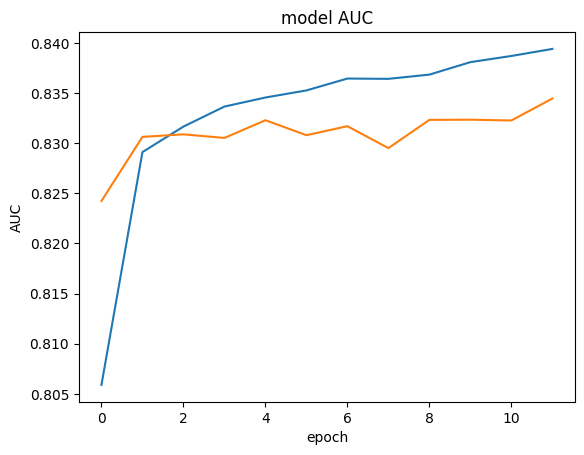

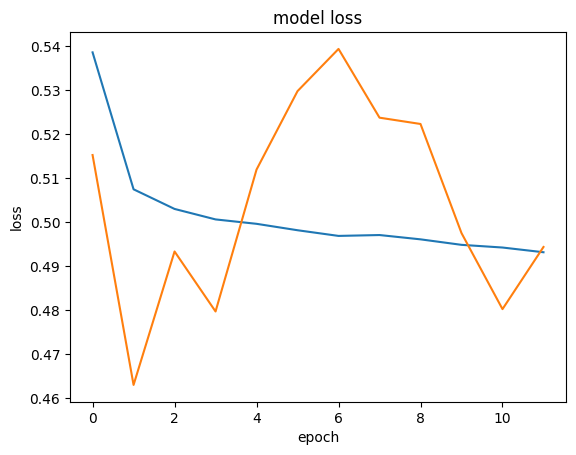

In [36]:
plt.plot(history.history['AUC'])
plt.plot(history.history['val_AUC'])
plt.title('model AUC')
plt.ylabel('AUC')
plt.xlabel('epoch')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [37]:
predictions_tf_prob = tf_model.predict(x_test_s)
predictions_tf = np.round(predictions_tf_prob).astype(int)

938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 940us/step


In [38]:
predictions_cat = cat_model.predict(x_test_s)

In [39]:
from sklearn.metrics import accuracy_score,roc_auc_score

roc_auc_tf = roc_auc_score(y_test_s, predictions_tf)
accuracy_tf = accuracy_score(y_test_s, predictions_tf)

roc_auc_cat = roc_auc_score(y_test_s, predictions_cat)
accuracy_cat = accuracy_score(y_test_s, predictions_cat)
print("\nTensorFlow:")
print("Accuracy:", accuracy_tf)
print("ROC AUC:", roc_auc_tf)
print("\nCatboost:")
print("Accuracy:", accuracy_cat)
print("ROC AUC:", roc_auc_cat)


TensorFlow:
Accuracy: 0.8364333333333334
ROC AUC: 0.7577081982476267

Catboost:
Accuracy: 0.9374
ROC AUC: 0.5943683589241446


tf показывает меньшую точность, но лучшее значение roc auc, чем catboost 